In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, SimpleRNN
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.datasets import mnist 

In [2]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()
print(x_train.shape)

(60000, 28, 28)


In [3]:
# number of labels
num_labels = len(np.unique(y_train))

In [4]:
# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [5]:
# image dimension
image_size = x_train.shape[1]


In [6]:
#resize and normalize
x_train = np.reshape(x_train,[-1,image_size,image_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test,[-1,image_size,image_size])
x_test = x_test.astype('float32') / 255

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [15]:
# network parameters
input_shape = (image_size,image_size)
batch_size = 128
units = 256
dropout = 0.2

In [16]:
model = Sequential()

In [17]:
model.add(SimpleRNN(units=units, dropout=dropout, input_shape = input_shape))

In [18]:
model.add(Dense(num_labels))

In [19]:
model.add(Activation('softmax'))

In [20]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_3 (SimpleRNN)     (None, 256)               72960     
_________________________________________________________________
dense (Dense)                (None, 10)                2570      
_________________________________________________________________
activation (Activation)      (None, 10)                0         
Total params: 75,530
Trainable params: 75,530
Non-trainable params: 0
_________________________________________________________________


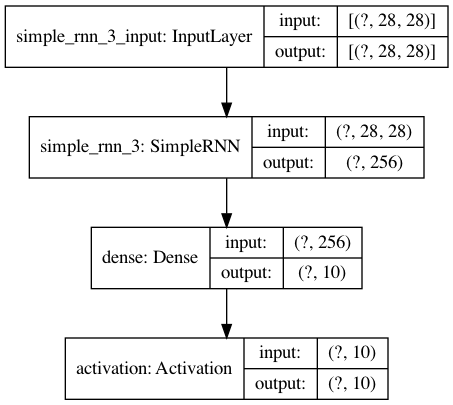

In [21]:
plot_model(model,to_file='cnn-mnist.png',show_shapes = True)

In [22]:
model.compile(loss = 'categorical_crossentropy',optimizer = 'sgd', metrics = ['accuracy'])

In [24]:
model.fit(x_train,y_train,epochs = 20,batch_size=batch_size)

Epoch 1/10
469/469 [==============================] - 19s 41ms/step - loss: 0.1029 - accuracy: 0.9692
Epoch 2/10
469/469 [==============================] - 20s 42ms/step - loss: 0.0995 - accuracy: 0.9696
Epoch 3/10
469/469 [==============================] - 20s 42ms/step - loss: 0.0933 - accuracy: 0.9722
Epoch 4/10
469/469 [==============================] - 20s 43ms/step - loss: 0.0903 - accuracy: 0.9728
Epoch 5/10
469/469 [==============================] - 20s 43ms/step - loss: 0.0877 - accuracy: 0.9736
Epoch 6/10
469/469 [==============================] - 20s 43ms/step - loss: 0.0845 - accuracy: 0.9735
Epoch 7/10
469/469 [==============================] - 20s 43ms/step - loss: 0.0796 - accuracy: 0.9758
Epoch 8/10
469/469 [==============================] - 20s 43ms/step - loss: 0.0767 - accuracy: 0.9767
Epoch 9/10
469/469 [==============================] - 20s 43ms/step - loss: 0.0731 - accuracy: 0.9775
Epoch 10/10
469/469 [==============================] - 20s 43ms/step - loss: 0.072

In [49]:
_ , acc = model.evaluate(x_test,y_test,batch_size=batch_size,verbose=1)

79/79 [==============================] - 2s 26ms/step - loss: 0.0736 - accuracy: 0.9763


In [50]:
print("Test Accuracy: %.1f%%" %(100*acc))

Test Accuracy: 97.6%
